In [1]:
#%pip install tensorflow==2.11.0
#%pip install keras
#%pip install numpy
#%pip install pandas
#%pip install seaborn
#%pip install matplotlib
#%pip install nltk
#%pip install scikit-learn
#%pip install wordcloud
#%pip install pillow

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import string
import nltk
import re
import tensorflow as tf
print("GPU is", "available" if tf.config.list_physical_devices('GPU') else "NOT AVAILABLE")
import random
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image
import warnings
from IPython.display import Javascript
warnings.filterwarnings("ignore")

GPU is available


In [3]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [4]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [5]:
%cd /content/gdrive/My Drive/Projekt

/content/gdrive/My Drive/Projekt


In [6]:
!ls

projekt_teksty_piosenek.csv  sample.csv  spotify_millsongdata.csv  teksty_piosenek_p.csv


In [7]:
#Wczytanie danych
data = pd.read_csv("spotify_millsongdata.csv", encoding='utf-8', on_bad_lines='skip')
data_sampled = data.sample(frac=0.05,random_state=42)
data.head()

artist                   song                                        link  \
0   ABBA  Ahe's My Kind Of Girl  /a/abba/ahes+my+kind+of+girl_20598417.html   
1   ABBA       Andante, Andante       /a/abba/andante+andante_20002708.html   
2   ABBA         As Good As New        /a/abba/as+good+as+new_20003033.html   
3   ABBA                   Bang                  /a/abba/bang_20598415.html   
4   ABBA       Bang-A-Boomerang      /a/abba/bang+a+boomerang_20002668.html   

                                                text  
0  Look at her face, it's a wonderful face  \r\nA...  
1  Take it easy with me, please  \r\nTouch me gen...  
2  I'll never know why I had to go  \r\nWhy I had...  
3  Making somebody happy is a question of give an...  
4  Making somebody happy is a question of give an...

In [8]:
print("Ilość piosenek:\n",data_sampled.artist.value_counts())

Ilość piosenek:
 artist
Cliff Richard                   16
Nazareth                        16
George Strait                   15
Tim McGraw                      15
Kenny Rogers                    14
                                ..
Yung Joc                         1
GMB                              1
Creedence Clearwater Revival     1
X                                1
Vangelis                         1
Name: count, Length: 567, dtype: int64


In [9]:
print("Wielkość bazy danych:",data_sampled.shape)

Wielkość bazy danych: (2882, 4)


In [10]:
# Obliczenie statystyk dotyczących danych
data_sampled["Ilość_znaków"] = data_sampled["text"].apply(len)
data_sampled["Ilość_słów"]=data_sampled.apply(lambda row: nltk.word_tokenize(row["text"]), axis=1).apply(len)
data_sampled["Ilość_linii"] = data_sampled["text"].str.split('\n').apply(len)
data_sampled.describe()

Ilość_znaków   Ilość_słów  Ilość_linii
count   2882.000000  2882.000000  2882.000000
mean    1218.083969   250.461138    42.259889
std      584.381995   127.474894    20.124537
min      412.000000    54.000000     9.000000
25%      811.000000   164.000000    28.000000
50%     1088.000000   219.000000    38.000000
75%     1471.750000   301.000000    52.000000
max     4117.000000   877.000000   235.000000

<Figure size 1500x1500 with 0 Axes>

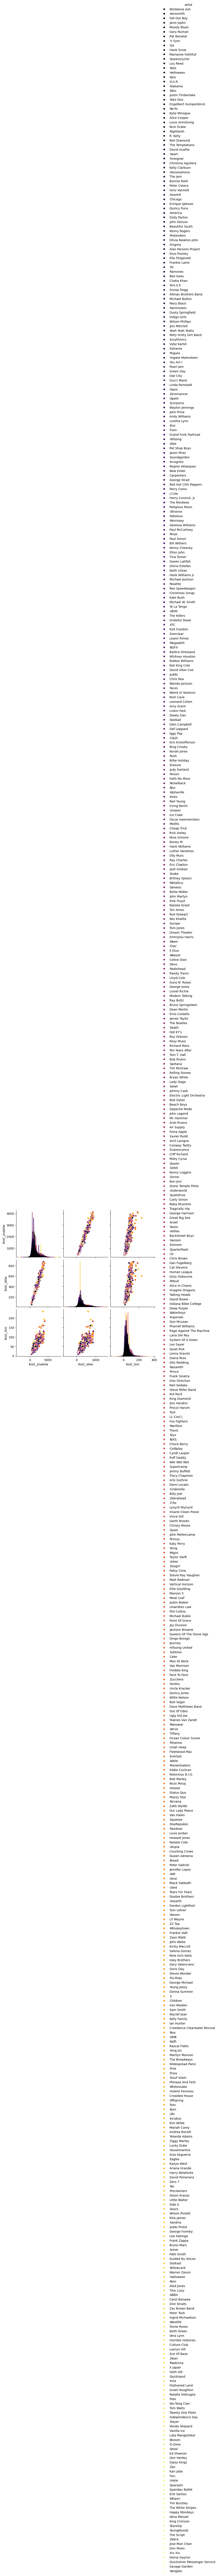

In [11]:
#Wykresy
plt.figure(figsize=(15,15))
ax = sns.pairplot(data_sampled, hue="artist", palette="inferno")

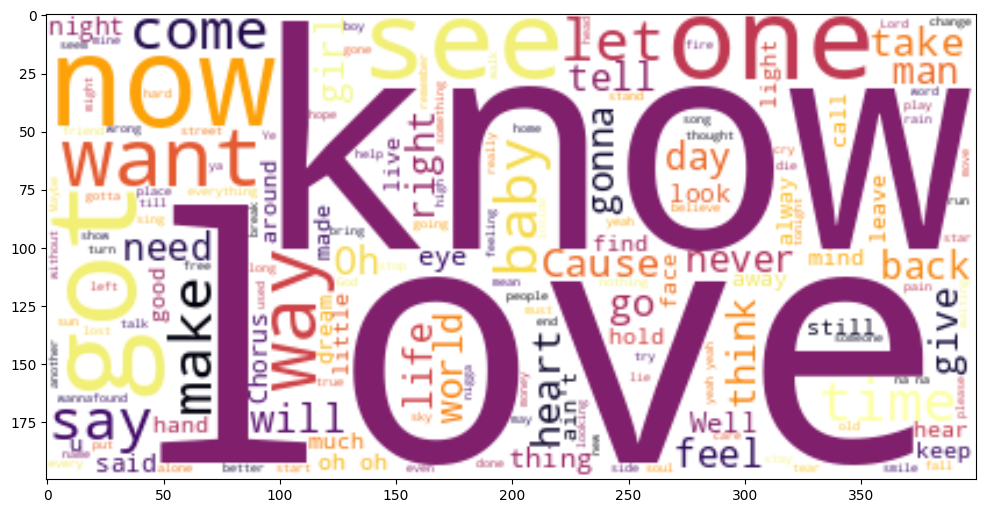

In [12]:
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white",colormap="inferno", max_words=800).generate(" ".join(data_sampled["text"]))
plt.figure(figsize=(12,12))
plt.imshow(wordcloud, interpolation="bilinear")
plt.show()

In [13]:
print(data_sampled.index)

Index([56679,   224, 32457,  9167, 13270, 33265, 47395, 44707, 51614, 35076,
       ...
       17342, 30092, 11711, 36817, 18591, 26214, 21476, 33415, 35623, 26676],
      dtype='int64', length=2882)


In [14]:
# Wywołanie funkcji dla całego tekstu piosenki
My_song= data_sampled['text'][224]
print(My_song)

This Little Light of Mine (Light of Mine),  
I'm Let it shine (Aleilujah),  
This Little Light of Mine, I'm gonna let it shine,  
  
Down in my heart (In my heart),  
I'm gonna let it shine (Aleilujah)  
Down in my heart (In My heart)  
I'm gonna let it, let it shine.  
  
All over the world (All over the world),  
I'm gonna let it shine (Let it shine, let it shine let it shine)  
Let it shine, let it shine, let it shine, let it shine




In [15]:
Corpus =''
for listitem in data_sampled.text:
    Corpus += listitem

Corpus = Corpus.lower() #konwersja wszystkich znaków na małe litery
print("Liczba unikalnych znaków:", len(set(Corpus)))

Liczba unikalnych znaków: 51


In [16]:
#Aby zobaczyć wszystkie unikalne znaki obecne w Korpusie
print("Unikalne znaki:",sorted(set(Corpus)))

Unikalne znaki: ['\n', '\r', ' ', '!', '"', "'", '(', ')', ',', '-', '.', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', ':', '?', '[', ']', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']


In [17]:
#Usunięcie niepotrzebnych znaków
to_remove = ['!','(', ')', '-', '[', ']']
for symbol in to_remove:
    Corpus = Corpus.replace(symbol," ")

In [18]:
# Przechowywanie wszystkich unikatowych elementów w celu zbudowania mappingu
symb = sorted(list(set(Corpus)))

L_corpus = len(Corpus) #długośc korpusu
L_symb = len(symb) #długość całkowitej liczby unikalnych znaków

#Budowanie słownika umożliwiającego dostęp do słownictwa z indeksów i odwrotnie
mapping = dict((c, i) for i, c in enumerate(symb))
reverse_mapping = dict((i, c) for i, c in enumerate(symb))

print("Suma liczby znaków:", L_corpus)
print("Ilość unikatowych znaków:", L_symb)

Suma liczby znaków: 3510518
Ilość unikatowych znaków: 45


In [19]:
#Tworzenie danych które będą wykorzystywane do uczenia modelu LSTM
length = 40
features = []
targets = []
for i in range(0, L_corpus - length, 1):
    feature = Corpus[i:i + length]
    target = Corpus[i + length]
    features.append([mapping[j] for j in feature])
    targets.append(mapping[target])


L_datapoints = len(targets)
print("Całkowita liczba sekwencji w korpusie:", L_datapoints)

Całkowita liczba sekwencji w korpusie: 3510478


In [20]:
X = (np.reshape(features, (L_datapoints, length, 1)).astype(np.float32)) / float(L_symb)


y = to_categorical(targets)#inicjalizacja modelu

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

model = Sequential()
#dodanie warstw
model.add(LSTM(256, input_shape=(X.shape[1], X.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(y.shape[1], activation='softmax'))
#model do treningu
opt = Adamax(learning_rate=0.01)
model.compile(loss='categorical_crossentropy', optimizer=opt)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 256)               264192    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 45)                11565     
                                                                 
Total params: 275757 (1.05 MB)
Trainable params: 275757 (1.05 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [21]:
# Dodanie EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', verbose=1,patience=5, restore_best_weights=True)

In [22]:
#imitacja ruchu użytkownika żeby nie stracić połączenia
def keep_alive():
    script = """
    function ClickConnect() {
        console.log("Reconnecting to avoid timeout...");
        document.querySelector("colab-toolbar-button#connect").click();
    }
    setInterval(ClickConnect, 60000); // Wykonuj funkcję co 60 sekund
    """
    display(Javascript(script))

keep_alive()

<IPython.core.display.Javascript object>

In [ ]:
history = model.fit(X_train, y_train, batch_size=128, epochs=80, validation_data=(X_val, y_val))

Epoch 1/80
21941/21941 [==============================] - 173s 8ms/step - loss: 2.1939 - val_loss: 1.9433
Epoch 2/80
21941/21941 [==============================] - 168s 8ms/step - loss: 1.9071 - val_loss: 1.7823
Epoch 3/80
21941/21941 [==============================] - 170s 8ms/step - loss: 1.8047 - val_loss: 1.7084
Epoch 4/80
21941/21941 [==============================] - ETA: 0s - loss: 1.7488

In [ ]:
history_df = pd.DataFrame(history.history)
fig = plt.figure(figsize=(15,4), facecolor="#B291B6")
fig.suptitle("Wykres uczenia")
pl = sns.lineplot(data=history_df["loss"], color="blue", label="Training Loss")
pl = sns.lineplot(data=history_df["val_loss"], color="red", label="Validation Loss")
pl.set(ylabel="Loss")
pl.set(xlabel="Epochs")
plt.legend()
plt.show()

In [ ]:
# funkcja generowania tekstu
def Lyrics_Generator(starter,Ch_count): #,temperature=1.0):
    generated= ""
    starter = starter
    seed=[mapping[char] for char in starter]
    generated += starter
    # Generating new text of given length
    for i in range(Ch_count):
        seed=[mapping[char] for char in starter]
        x_pred = np.reshape(seed, (1, len(seed), 1))
        x_pred = x_pred/ float(L_symb)
        prediction = model.predict(x_pred, verbose=0)[0]
        # Getting the index of the next most probable index
        prediction = np.asarray(prediction).astype('float64')
        prediction = np.log(prediction) / 1.0
        exp_preds = np.exp(prediction)
        prediction = exp_preds / np.sum(exp_preds)
        probas = np.random.multinomial(1, prediction, 1)
        index = np.argmax(prediction)
        next_char = reverse_mapping[index]
        # Generating new text
        generated += next_char
        starter = starter[1:] + next_char

    return generated

In [ ]:
generated_text = Lyrics_Generator("can we be happy and shine like a moonpie", 400)
print(generated_text)